In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [81]:
bear1 = pd.read_csv(r'C:\Users\User\Desktop\hh.csv')

In [82]:
bear1.columns

Index(['Unnamed: 0', 'Max', 'Min', 'Mean', 'Std', 'RMS', 'Skewness',
       'Kurtosis', 'P2P', 'Crest Factor', 'Variance', 'Fault', 'Defect'],
      dtype='object')

In [83]:
bear1=bear1.drop(labels='Unnamed: 0',axis=1)
bear1=bear1.drop(labels='Fault',axis=1)

In [84]:
bear1.dropna(inplace=True)

In [85]:
bear1

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Defect
0,0.32,-0.2,0.047824,0.064290,0.080101,0.001269,1.847866,0.12,3.994980,0.004133,Yes
1,0.96,-0.2,0.049203,0.074959,0.089633,3.380106,38.374250,0.76,10.710320,0.005619,Yes
2,0.90,-0.2,0.047670,0.067443,0.082561,2.494656,26.407668,0.70,10.901036,0.004549,Yes
3,0.35,-1.0,0.047955,0.069054,0.084044,-3.219543,53.590734,-0.65,4.164495,0.004768,Yes
4,0.96,-0.2,0.048518,0.069309,0.084575,2.487599,30.184741,0.76,11.350878,0.004804,Yes
...,...,...,...,...,...,...,...,...,...,...,...
899,0.51,-0.2,0.155025,0.080029,0.174445,0.055514,1.682962,0.31,2.923561,0.006405,Yes
900,0.54,-0.2,0.160798,0.081969,0.180467,0.347105,1.352100,0.34,2.992244,0.006719,Yes
901,0.53,-0.2,0.157371,0.078050,0.175645,0.360563,2.130960,0.33,3.017455,0.006092,Yes
902,1.04,-0.2,0.160827,0.086393,0.182542,1.437458,11.497220,0.84,5.697309,0.007464,Yes


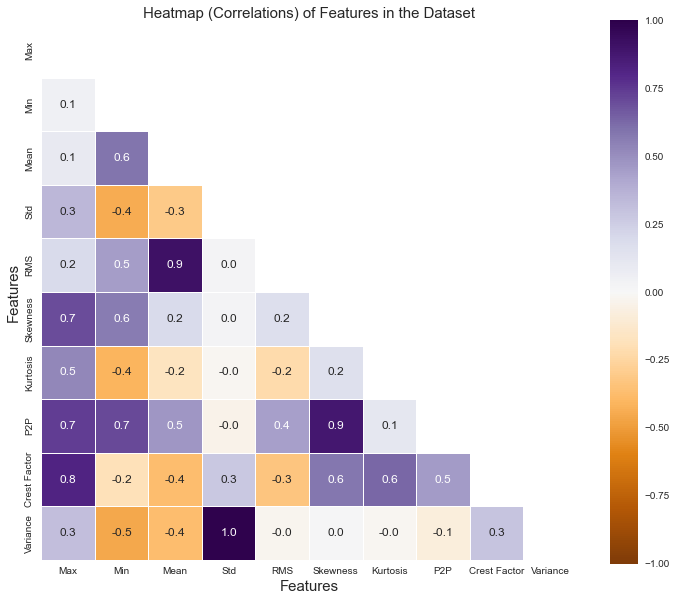

In [86]:
dataset_corr = bear1.corr().round(4)

# Drop Agent_ID from correlation dataset.
#dataset_corr = dataset_corr.drop(["Agent_ID"], axis=1)
#dataset_corr = dataset_corr.drop(["Agent_ID"], axis=0)

# Create a correlation matrix. Only bottom left corner valued. 
mask = np.zeros_like(dataset_corr.round(4))
mask[np.triu_indices_from(mask)] = True

# Generate the corrleation matrix (heatmap) using Seaborn. 
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(dataset_corr.round(2), mask=mask, vmax=1, center = 0, vmin=-1, square=True, cmap='PuOr', linewidths=.5, annot=True, annot_kws={"size": 12}, fmt='.1f')
    plt.title('Heatmap (Correlations) of Features in the Dataset', fontsize=15)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Features', fontsize=15)
plt.show()

In [87]:
def data_summary(df):
    '''Summary dataframe information'''

    df = pd.DataFrame({'type': df.dtypes,
                       'amount': df.isna().sum(),
                       'unique': df.nunique(),
                       'max' : df.max(),
                       'min' : df.min(),
                       'mean' : df.mean() })
    return df

In [88]:
data_summary(bear1)

,type,amount,unique,max,min,mean
Crest Factor,float64,0,904,16.404196,1.662151,4.384222
Defect,object,0,2,Yes,No,NaN
Kurtosis,float64,0,904,89.044723,-0.396894,10.202765
Max,float64,0,76,2.0,0.24,0.676084
Mean,float64,0,901,0.290169,-0.032784,0.130332
Min,float64,0,26,0.02,-1.2,-0.254867
P2P,float64,0,164,1.8,-0.81,0.421217
RMS,float64,0,904,0.297782,0.075168,0.159793
Skewness,float64,0,904,5.788816,-5.064335,0.476663
Std,float64,0,904,0.145077,0.041061,0.082672


In [91]:
from pycaret.classification import *
exp_name = setup(data = bear1 ,  target = 'Defect',normalize = True,fix_imbalance=True, session_id=123)

,Description,Value
0,session_id,123
1,Target,Defect
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(904, 11)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [92]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9652,0.9834,0.9749,0.9792,0.9768,0.9066,0.9082,0.1490
catboost,CatBoost Classifier,0.9636,0.9849,0.9727,0.9792,0.9757,0.9030,0.9050,2.5340
rf,Random Forest Classifier,0.9620,0.9833,0.9728,0.9772,0.9747,0.8982,0.9002,0.2250
gbc,Gradient Boosting Classifier,0.9604,0.9858,0.9728,0.9751,0.9737,0.8934,0.8950,0.1350
xgboost,Extreme Gradient Boosting,0.9589,0.9821,0.9707,0.9752,0.9727,0.8893,0.8913,0.0910
lightgbm,Light Gradient Boosting Machine,0.9572,0.9833,0.9665,0.9770,0.9715,0.8856,0.8871,0.0680
ada,Ada Boost Classifier,0.9541,0.9705,0.9644,0.9750,0.9692,0.8790,0.8821,0.0890
dt,Decision Tree Classifier,0.9525,0.9470,0.9582,0.9790,0.9681,0.8752,0.8784,0.0150
knn,K Neighbors Classifier,0.9445,0.9677,0.9477,0.9786,0.9626,0.8557,0.8591,0.0310
qda,Quadratic Discriminant Analysis,0.8875,0.9677,0.8805,0.9683,0.9216,0.7240,0.7364,0.0140


In [93]:
compare_models(sort = 'Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9652,0.9834,0.9749,0.9792,0.9768,0.9066,0.9082,0.1450
rf,Random Forest Classifier,0.9620,0.9833,0.9728,0.9772,0.9747,0.8982,0.9002,0.1850
gbc,Gradient Boosting Classifier,0.9604,0.9858,0.9728,0.9751,0.9737,0.8934,0.8950,0.1290
catboost,CatBoost Classifier,0.9636,0.9849,0.9727,0.9792,0.9757,0.9030,0.9050,2.6480
xgboost,Extreme Gradient Boosting,0.9589,0.9821,0.9707,0.9752,0.9727,0.8893,0.8913,0.0930
lightgbm,Light Gradient Boosting Machine,0.9572,0.9833,0.9665,0.9770,0.9715,0.8856,0.8871,0.0700
ada,Ada Boost Classifier,0.9541,0.9705,0.9644,0.9750,0.9692,0.8790,0.8821,0.0850
dt,Decision Tree Classifier,0.9525,0.9470,0.9582,0.9790,0.9681,0.8752,0.8784,0.0160
knn,K Neighbors Classifier,0.9445,0.9677,0.9477,0.9786,0.9626,0.8557,0.8591,0.0210
qda,Quadratic Discriminant Analysis,0.8875,0.9677,0.8805,0.9683,0.9216,0.7240,0.7364,0.0140


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [28]:
qda = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9688,0.9959,1.0000,0.9608,0.9800,0.9087,0.9125
1,0.9219,0.9973,0.8980,1.0000,0.9462,0.8049,0.8207
2,0.9683,0.9971,0.9796,0.9796,0.9796,0.9082,0.9082
3,0.9841,0.9985,1.0000,0.9800,0.9899,0.9529,0.9539
4,0.9365,0.9674,0.9583,0.9583,0.9583,0.8250,0.8250
5,0.9365,0.9861,0.9583,0.9583,0.9583,0.8250,0.8250
6,0.9524,0.9535,1.0000,0.9412,0.9697,0.8591,0.8677
7,0.9841,0.9896,1.0000,0.9796,0.9897,0.9552,0.9562
8,0.9841,0.9917,1.0000,0.9796,0.9897,0.9552,0.9562


In [29]:
print(qda)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=789, verbose=0,
                       warm_start=False)


In [30]:
tun_qda=tune_model(qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9688,0.9986,1.0000,0.9608,0.9800,0.9087,0.9125
1,0.9688,0.9973,0.9592,1.0000,0.9792,0.9168,0.9200
2,0.9683,1.0000,0.9592,1.0000,0.9792,0.9126,0.9161
3,0.9841,0.9985,1.0000,0.9800,0.9899,0.9529,0.9539
4,0.9365,0.9750,0.9583,0.9583,0.9583,0.8250,0.8250
5,0.9206,0.9792,0.9375,0.9574,0.9474,0.7862,0.7869
6,0.9524,0.9514,1.0000,0.9412,0.9697,0.8591,0.8677
7,0.9841,0.9944,1.0000,0.9796,0.9897,0.9552,0.9562
8,0.9683,0.9875,0.9792,0.9792,0.9792,0.9125,0.9125


In [20]:
print(tun_qda)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=240, n_jobs=-1, oob_score=False,
                       random_state=789, verbose=0, warm_start=False)


In [32]:
tun_qda1=tune_model(tun_qda,custom_grid ={'max_depth':[0,7,12,20],'min_samples_split':[2],'n_estimators':[200,270,300,400,750]},search_algorithm='grid')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9688,1.0000,1.0000,0.9608,0.9800,0.9087,0.9125
1,0.9688,0.9973,0.9592,1.0000,0.9792,0.9168,0.9200
2,0.9683,1.0000,0.9592,1.0000,0.9792,0.9126,0.9161
3,0.9841,0.9971,1.0000,0.9800,0.9899,0.9529,0.9539
4,0.9365,0.9694,0.9583,0.9583,0.9583,0.8250,0.8250
5,0.9206,0.9806,0.9375,0.9574,0.9474,0.7862,0.7869
6,0.9524,0.9472,1.0000,0.9412,0.9697,0.8591,0.8677
7,0.9841,0.9972,1.0000,0.9796,0.9897,0.9552,0.9562
8,0.9683,0.9917,0.9792,0.9792,0.9792,0.9125,0.9125


In [94]:
print(tun_qda1)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=7, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=400, n_jobs=-1, oob_score=False,
                       random_state=789, verbose=0, warm_start=False)


In [95]:
f=finalize_model(tun_qda1)

In [96]:
save_model(f, 'Random_Forest')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Defect',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='entropy', max_depth=7,
                                         max_featu

In [97]:
a1=predict_model(f)
a1

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9890,0.9996,0.9955,0.9910,0.9932,0.9635,0.9636


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Defect,Label,Score
0,-0.366399,-0.121413,0.634512,0.057883,0.665049,-0.261055,-0.541214,-0.340486,-0.627205,-0.029624,Yes,Yes,0.9940
1,-0.129833,0.573632,0.713067,0.151964,0.783840,-0.086125,-0.587628,0.300800,-0.478491,0.060985,Yes,Yes,0.9417
2,0.782636,0.573632,0.596775,0.358724,0.674198,0.399996,-0.263603,0.942087,0.277609,0.265379,Yes,Yes,0.9763
3,-1.042303,-1.859027,-2.959976,1.542094,-1.423594,-0.786182,-0.488877,-2.003081,-0.490817,1.574422,Yes,Yes,1.0000
4,1.762696,0.226110,0.165327,1.757656,0.465871,0.859221,-0.005879,1.393363,1.187111,1.838395,Yes,Yes,0.9978
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,0.884022,-2.449815,-1.464270,1.663530,-1.096771,-0.912055,0.473817,-1.053027,1.680837,1.722163,Yes,Yes,0.9854
268,-1.076098,0.226110,-1.583892,-1.156296,-2.176715,-0.164477,-0.619202,-0.601751,-0.002742,-1.064570,Yes,Yes,0.9942
269,-0.231219,0.921155,0.624640,-1.103369,0.454016,-0.191581,-0.584370,0.467060,-0.450772,-1.024658,Yes,Yes,0.9961
270,0.579865,0.921155,0.225714,-1.047403,-0.065545,0.598939,0.050856,1.037093,0.498420,-0.981938,No,No,0.9969


In [98]:
a1['Score'].describe()

count    272.000000
mean       0.949078
std        0.108566
min        0.501000
25%        0.970175
50%        0.991050
75%        0.996900
max        1.000000
Name: Score, dtype: float64

In [99]:
bear1

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Defect
0,0.32,-0.2,0.047824,0.064290,0.080101,0.001269,1.847866,0.12,3.994980,0.004133,Yes
1,0.96,-0.2,0.049203,0.074959,0.089633,3.380106,38.374250,0.76,10.710320,0.005619,Yes
2,0.90,-0.2,0.047670,0.067443,0.082561,2.494656,26.407668,0.70,10.901036,0.004549,Yes
3,0.35,-1.0,0.047955,0.069054,0.084044,-3.219543,53.590734,-0.65,4.164495,0.004768,Yes
4,0.96,-0.2,0.048518,0.069309,0.084575,2.487599,30.184741,0.76,11.350878,0.004804,Yes
...,...,...,...,...,...,...,...,...,...,...,...
899,0.51,-0.2,0.155025,0.080029,0.174445,0.055514,1.682962,0.31,2.923561,0.006405,Yes
900,0.54,-0.2,0.160798,0.081969,0.180467,0.347105,1.352100,0.34,2.992244,0.006719,Yes
901,0.53,-0.2,0.157371,0.078050,0.175645,0.360563,2.130960,0.33,3.017455,0.006092,Yes
902,1.04,-0.2,0.160827,0.086393,0.182542,1.437458,11.497220,0.84,5.697309,0.007464,Yes


In [100]:
te=([0.81327723,-0.071257335,0.1865952,0.013204217,0.16335147,0.089363198,1.861900409,0.010070388,6.098749459,0.000174351],
[0.47127622,-0.06731117,0.1763579,0.012991384,0.18110283,-0.067930011,0.275259641,-0.020183548,3.594706824,0.000168776],
   )

In [101]:
t1 = pd.DataFrame(te)
t1 = pd.DataFrame(te)
t1.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']

In [102]:
predict_model(f,data=t1)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,0.813277,-0.071257,0.186595,0.013204,0.163351,0.089363,1.86190,0.010070,6.098749,0.000174,Yes,0.8078
1,0.471276,-0.067311,0.176358,0.012991,0.181103,-0.067930,0.27526,-0.020184,3.594707,0.000169,Yes,0.8567


In [103]:
h1=([0.44,-0.2,0.123996,0.084099,0.149802,0.152354,0.479698,0.24,2.937215,0.007073],
    [0.45,-0.1,0.172497,0.069513,0.185964,0.331445,1.026297,0.35,2.419824,0.004832],
    [0.94,-0.2,0.131403,0.085051,0.156503,1.203879,8.536282,0.74,6.006293,0.007234],
    [0.53,-0.1,0.131569,0.078601,0.153239,0.293130,0.657648,0.43,3.458642,0.006178],
    [0.47,-1.0,0.122571,0.092435,0.153490,-1.672345,21.890319,-0.53,3.062093,0.008544]
)

In [104]:
h2=([0.93,-0.1,0.142014,0.067940,0.157414,1.586626,17.607589,0.83,5.907977,0.004616],
[0.33,-0.1,0.134848,0.060977,0.147982,0.023616,0.024349,0.23,2.230005,0.003718],
[0.38,0.0,0.135025,0.064258,0.149522,0.206172,0.028471,0.38,2.541439,0.004129],
[0.88,0.0,0.131468,0.061468,0.145114,1.779141,21.442603,0.88,6.064180,0.003778],
[0.35,-0.1,0.138022,0.064652,0.152400,-0.037061,-0.179668,0.25,2.296584,0.004180]
)

In [105]:
i1=([0.91,-0.5,0.046495,0.071964,0.085647,1.414784,24.164072,0.41,10.624979,0.005179],
[0.90,-0.9,0.050566,0.070413,0.086660,-0.527620,53.647744,0.00,10.385446,0.004958],
[0.26,-0.2,0.053877,0.058863,0.079776,0.063231,1.832492,0.06,3.259141,0.003465],
[0.94,-8.0,0.047485,0.266089,0.270160,-28.028423,845.712005,-7.06,3.479420,0.070803],
[0.38,-0.2,0.050937,0.067351,0.084416,0.536414,2.236870,0.18,4.501510,0.004536])

In [106]:
i2=([0.81,-0.3,0.047779,0.095461,0.106707,0.764967,5.532956,0.51,7.590905,0.009113],
[0.60,-0.5,0.049372,0.099826,0.111323,-0.070157,4.159109,0.10,5.389743,0.009965],
   [0.57,-1.0,0.037088,0.126841,0.132091,-0.471857,5.857422,-0.43,4.315220,0.016089])

In [107]:
i3=([1.00,-1.0,-0.030020,0.116994,0.120727,-1.209682,18.664996,0.00,8.283161,0.013688],
[0.26,-0.9,-0.025442,0.100593,0.103711,-1.052930,5.843125,-0.64,2.506960,0.010119],
[1.10,-0.9,-0.037097,0.125717,0.131015,0.209913,9.017225,0.20,8.395988,0.015805],
[0.32,-1.0,-0.034768,0.105299,0.110840,-0.897372,6.961503,-0.68,2.887035,0.011088])

In [108]:
o1=([0.48,-0.1,0.151577,0.070922,0.167334,0.292632,1.208204,0.38,2.868523,0.005030],
[0.53,-0.2,0.163499,0.078457,0.181332,0.080639,1.328375,0.33,2.922818,0.006156],
[1.10,-0.1,0.168843,0.080271,0.186936,1.479434,17.701538,1.00,5.884375,0.006443],
[0.50,-0.4,0.153450,0.068876,0.168185,-0.348831,5.028597,0.10,2.972922,0.004744],
[0.56,-0.2,0.166305,0.081045,0.184984,0.020975,1.787201,0.36,3.027289,0.006568])

In [109]:
o2=([0.56,0.0,0.171578,0.082894,0.190535,0.337447,0.666960,0.56,2.939093,0.006871],
[0.56,0.0,0.174226,0.076419,0.190233,0.340678,0.947800,0.56,2.943751,0.005840],
[0.54,-0.1,0.162823,0.084601,0.183470,0.101105,0.634961,0.44,2.943258,0.007157],
[0.51,-0.1,0.166650,0.086712,0.187839,0.128636,0.425262,0.41,2.715087,0.007519],
[1.10,-0.2,0.163592,0.098397,0.190879,1.996309,16.345382,0.90,5.762819,0.009682])

In [110]:
o3=([1.04,-0.1,0.154434,0.084858,0.176192,1.157574,11.491961,0.94,5.902660,0.007201],
[1.13,-0.2,0.157336,0.079749,0.176375,1.765481,22.000948,0.93,6.406800,0.006360],
[0.56,0.0,0.170870,0.069421,0.184421,0.455573,1.641811,0.56,3.036529,0.004819],
[1.20,-0.1,0.140959,0.098588,0.171986,2.537921,22.875365,1.10,6.977321,0.009720],
[1.10,-0.2,0.152626,0.083007,0.173718,1.492731,16.958877,0.90,6.332098,0.006890])

In [111]:
r1=([0.38,-0.2,0.162735,0.065905,0.175561,-0.349290,0.922935,0.18,2.164489,0.004344],
[0.44,-0.2,0.158973,0.065441,0.171902,-0.244411,1.659661,0.24,2.559591,0.004283],
[0.50,-0.2,0.164316,0.069443,0.178374,-0.260703,2.051488,0.30,2.803103,0.004822],
[1.10,-0.2,0.161911,0.077674,0.179562,3.340634,42.075947,0.90,6.126032,0.006033],
[1.08,-0.1,0.162876,0.076553,0.179953,1.613647,20.257727,0.98,6.001580,0.005860])

In [112]:
r2=([0.45,-0.2,0.146087,0.079756,0.166421,0.161452,0.714523,0.25,2.703980,0.006361],
[0.56,-0.2,0.143810,0.082211,0.165629,0.218451,1.084127,0.36,3.381046,0.006759],
[0.59,-0.1,0.142085,0.090599,0.168487,0.575497,1.640793,0.49,3.501745,0.008208],
[0.59,-0.6,0.140870,0.097391,0.171230,0.022397,4.858825,-0.01,3.445651,0.009485],
[0.71,-0.2,0.141699,0.107962,0.178108,0.912137,3.140272,0.51,3.986340,0.011656])

In [113]:
r3=([0.51,-0.2,0.160686,0.081199,0.180018,0.275487,1.423003,0.31,2.833042,0.006593],
[0.54,-0.1,0.160111,0.080817,0.179333,0.264109,1.109702,0.44,3.011163,0.006531],
[0.53,-0.2,0.165943,0.084751,0.186313,0.200488,1.004413,0.33,2.844674,0.007183],
[0.47,-0.1,0.152004,0.078828,0.171210,0.221198,0.897788,0.37,2.745172,0.006214],
[0.45,-0.1,0.152931,0.075514,0.170542,0.135119,0.666280,0.35,2.638650,0.005702])

In [114]:
h3=([0.87,-0.1,0.131700,0.067312,0.147889,1.565363,14.516265,0.77,5.882777,0.004531],
[0.50,-0.1,0.133427,0.065908,0.148803,0.443677,1.624400,0.40,3.360147,0.004344],
[0.90,-0.1,0.140010,0.061990,0.153107,1.811952,22.342768,0.80,5.878252,0.003843],
[0.91,-0.1,0.131429,0.074594,0.151103,2.360906,22.344879,0.81,6.022372,0.005564],
[0.96,-0.1,0.129413,0.072858,0.148494,1.550910,16.211832,0.86,6.464887,0.005308])

In [115]:
test=([0.10,-0.2,0.01714,0.151970,0.17982,0.178843,0.712588,0.92,-0.098701,0.023095],
[0.09,-0.2,0.21137,0.141186,0.15629,0.863843,5.816885,0.67,0.087307,0.019934],
[0.23,-0.1,0.09399,0.144717,0.17866,1.543453,11.114996,0.87,0.225553,0.020943])

In [116]:
h1 = pd.DataFrame(h1)
df = pd.DataFrame(h1)
df.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']

h2 = pd.DataFrame(h2)
df2 = pd.DataFrame(h2)
df2.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']

h3 = pd.DataFrame(h3)
df12 = pd.DataFrame(h3)
df12.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']

In [117]:
i1 = pd.DataFrame(i1)
df3 = pd.DataFrame(i1)
df3.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']


i2 = pd.DataFrame(i2)
df4 = pd.DataFrame(i2)
df4.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']


i3 = pd.DataFrame(i3)
df5 = pd.DataFrame(i3)
df5.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']

In [118]:
o1 = pd.DataFrame(o1)
df6 = pd.DataFrame(o1)
df6.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']

o2 = pd.DataFrame(o2)
df7 = pd.DataFrame(o2)
df7.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']


o3 = pd.DataFrame(o3)
df8 = pd.DataFrame(o3)
df8.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']

In [119]:
r1 = pd.DataFrame(r1)
df9 = pd.DataFrame(r1)
df9.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']


r2 = pd.DataFrame(r2)
df10 = pd.DataFrame(r2)
df10.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']

r3 = pd.DataFrame(r3)
df11 = pd.DataFrame(r3)
df11.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']

In [120]:
test = pd.DataFrame(test)
test = pd.DataFrame(test)
test.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','P2P','Crest Factor','Variance']

In [121]:
#df1,df2,df12 = healthy A1,A2,A3
#df3,df4,df5 = inner A1,A2,A3
#df6,df7,df8 = outer A1,A2,A3
#df9,df10,df11 = roller A1,A2,A3

In [122]:
#print(hash(bear1))

In [123]:
#bear1.shape

In [124]:
predict_model(f,data=test)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,0.10,-0.2,0.01714,0.151970,0.17982,0.178843,0.712588,0.92,-0.098701,0.023095,Yes,0.9731
1,0.09,-0.2,0.21137,0.141186,0.15629,0.863843,5.816885,0.67,0.087307,0.019934,Yes,0.7597
2,0.23,-0.1,0.09399,0.144717,0.17866,1.543453,11.114996,0.87,0.225553,0.020943,Yes,0.9436


In [125]:
predict_model(f,data=df12)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,0.87,-0.1,0.131700,0.067312,0.147889,1.565363,14.516265,0.77,5.882777,0.004531,No,0.9850
1,0.50,-0.1,0.133427,0.065908,0.148803,0.443677,1.624400,0.40,3.360147,0.004344,No,0.9050
2,0.90,-0.1,0.140010,0.061990,0.153107,1.811952,22.342768,0.80,5.878252,0.003843,No,0.9809
3,0.91,-0.1,0.131429,0.074594,0.151103,2.360906,22.344879,0.81,6.022372,0.005564,No,0.9958
4,0.96,-0.1,0.129413,0.072858,0.148494,1.550910,16.211832,0.86,6.464887,0.005308,No,0.9944


In [126]:
predict_model(f,data=df)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,0.44,-0.2,0.123996,0.084099,0.149802,0.152354,0.479698,0.24,2.937215,0.007073,No,0.9238
1,0.45,-0.1,0.172497,0.069513,0.185964,0.331445,1.026297,0.35,2.419824,0.004832,Yes,0.6656
2,0.94,-0.2,0.131403,0.085051,0.156503,1.203879,8.536282,0.74,6.006293,0.007234,No,0.9674
3,0.53,-0.1,0.131569,0.078601,0.153239,0.293130,0.657648,0.43,3.458642,0.006178,No,0.8975
4,0.47,-1.0,0.122571,0.092435,0.153490,-1.672345,21.890319,-0.53,3.062093,0.008544,No,0.9906


In [127]:
predict_model(f,data=df2)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,0.93,-0.1,0.142014,0.067940,0.157414,1.586626,17.607589,0.83,5.907977,0.004616,No,0.9741
1,0.33,-0.1,0.134848,0.060977,0.147982,0.023616,0.024349,0.23,2.230005,0.003718,No,0.9997
2,0.38,0.0,0.135025,0.064258,0.149522,0.206172,0.028471,0.38,2.541439,0.004129,No,0.9887
3,0.88,0.0,0.131468,0.061468,0.145114,1.779141,21.442603,0.88,6.064180,0.003778,No,0.9985
4,0.35,-0.1,0.138022,0.064652,0.152400,-0.037061,-0.179668,0.25,2.296584,0.004180,No,0.9992


In [128]:
predict_model(f,data=df3)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,0.91,-0.5,0.046495,0.071964,0.085647,1.414784,24.164072,0.41,10.624979,0.005179,Yes,0.9854
1,0.90,-0.9,0.050566,0.070413,0.086660,-0.527620,53.647744,0.00,10.385446,0.004958,Yes,0.9887
2,0.26,-0.2,0.053877,0.058863,0.079776,0.063231,1.832492,0.06,3.259141,0.003465,Yes,0.9960
3,0.94,-8.0,0.047485,0.266089,0.270160,-28.028423,845.712005,-7.06,3.479420,0.070803,Yes,0.8461
4,0.38,-0.2,0.050937,0.067351,0.084416,0.536414,2.236870,0.18,4.501510,0.004536,Yes,0.9898


In [129]:
predict_model(f,data=df4)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,0.81,-0.3,0.047779,0.095461,0.106707,0.764967,5.532956,0.51,7.590905,0.009113,Yes,0.9739
1,0.60,-0.5,0.049372,0.099826,0.111323,-0.070157,4.159109,0.10,5.389743,0.009965,Yes,1.0000
2,0.57,-1.0,0.037088,0.126841,0.132091,-0.471857,5.857422,-0.43,4.315220,0.016089,Yes,1.0000


In [130]:
predict_model(f,data=df5)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,1.00,-1.0,-0.030020,0.116994,0.120727,-1.209682,18.664996,0.00,8.283161,0.013688,Yes,0.9829
1,0.26,-0.9,-0.025442,0.100593,0.103711,-1.052930,5.843125,-0.64,2.506960,0.010119,Yes,0.9992
2,1.10,-0.9,-0.037097,0.125717,0.131015,0.209913,9.017225,0.20,8.395988,0.015805,Yes,0.9887
3,0.32,-1.0,-0.034768,0.105299,0.110840,-0.897372,6.961503,-0.68,2.887035,0.011088,Yes,1.0000


In [131]:
predict_model(f,data=df6)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,0.48,-0.1,0.151577,0.070922,0.167334,0.292632,1.208204,0.38,2.868523,0.005030,Yes,0.9952
1,0.53,-0.2,0.163499,0.078457,0.181332,0.080639,1.328375,0.33,2.922818,0.006156,Yes,0.9890
2,1.10,-0.1,0.168843,0.080271,0.186936,1.479434,17.701538,1.00,5.884375,0.006443,No,0.5144
3,0.50,-0.4,0.153450,0.068876,0.168185,-0.348831,5.028597,0.10,2.972922,0.004744,Yes,0.9914
4,0.56,-0.2,0.166305,0.081045,0.184984,0.020975,1.787201,0.36,3.027289,0.006568,Yes,0.6469


In [132]:
predict_model(f,data=df7)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,0.56,0.0,0.171578,0.082894,0.190535,0.337447,0.666960,0.56,2.939093,0.006871,Yes,0.6622
1,0.56,0.0,0.174226,0.076419,0.190233,0.340678,0.947800,0.56,2.943751,0.005840,Yes,0.6878
2,0.54,-0.1,0.162823,0.084601,0.183470,0.101105,0.634961,0.44,2.943258,0.007157,Yes,0.9817
3,0.51,-0.1,0.166650,0.086712,0.187839,0.128636,0.425262,0.41,2.715087,0.007519,Yes,0.9248
4,1.10,-0.2,0.163592,0.098397,0.190879,1.996309,16.345382,0.90,5.762819,0.009682,Yes,0.9710


In [133]:
predict_model(f,data=df8)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,1.04,-0.1,0.154434,0.084858,0.176192,1.157574,11.491961,0.94,5.902660,0.007201,Yes,0.9643
1,1.13,-0.2,0.157336,0.079749,0.176375,1.765481,22.000948,0.93,6.406800,0.006360,Yes,0.9850
2,0.56,0.0,0.170870,0.069421,0.184421,0.455573,1.641811,0.56,3.036529,0.004819,Yes,0.5995
3,1.20,-0.1,0.140959,0.098588,0.171986,2.537921,22.875365,1.10,6.977321,0.009720,Yes,0.9236
4,1.10,-0.2,0.152626,0.083007,0.173718,1.492731,16.958877,0.90,6.332098,0.006890,Yes,0.9597


In [134]:
predict_model(f,data=df9)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,0.38,-0.2,0.162735,0.065905,0.175561,-0.349290,0.922935,0.18,2.164489,0.004344,Yes,0.9855
1,0.44,-0.2,0.158973,0.065441,0.171902,-0.244411,1.659661,0.24,2.559591,0.004283,Yes,0.9886
2,0.50,-0.2,0.164316,0.069443,0.178374,-0.260703,2.051488,0.30,2.803103,0.004822,Yes,0.9947
3,1.10,-0.2,0.161911,0.077674,0.179562,3.340634,42.075947,0.90,6.126032,0.006033,Yes,0.8285
4,1.08,-0.1,0.162876,0.076553,0.179953,1.613647,20.257727,0.98,6.001580,0.005860,Yes,0.9816


In [135]:
predict_model(f,data=df10)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,0.45,-0.2,0.146087,0.079756,0.166421,0.161452,0.714523,0.25,2.703980,0.006361,Yes,0.9937
1,0.56,-0.2,0.143810,0.082211,0.165629,0.218451,1.084127,0.36,3.381046,0.006759,Yes,0.9928
2,0.59,-0.1,0.142085,0.090599,0.168487,0.575497,1.640793,0.49,3.501745,0.008208,Yes,0.9728
3,0.59,-0.6,0.140870,0.097391,0.171230,0.022397,4.858825,-0.01,3.445651,0.009485,Yes,0.8660
4,0.71,-0.2,0.141699,0.107962,0.178108,0.912137,3.140272,0.51,3.986340,0.011656,Yes,0.9970


In [136]:
predict_model(f,data=df11)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,P2P,Crest Factor,Variance,Label,Score
0,0.51,-0.2,0.160686,0.081199,0.180018,0.275487,1.423003,0.31,2.833042,0.006593,Yes,0.9937
1,0.54,-0.1,0.160111,0.080817,0.179333,0.264109,1.109702,0.44,3.011163,0.006531,Yes,0.9893
2,0.53,-0.2,0.165943,0.084751,0.186313,0.200488,1.004413,0.33,2.844674,0.007183,Yes,0.9276
3,0.47,-0.1,0.152004,0.078828,0.171210,0.221198,0.897788,0.37,2.745172,0.006214,Yes,0.9921
4,0.45,-0.1,0.152931,0.075514,0.170542,0.135119,0.666280,0.35,2.638650,0.005702,Yes,0.9924


In [3]:
a=plot_model(f, plot = 'class_report')

NameError: name 'plot_model' is not defined

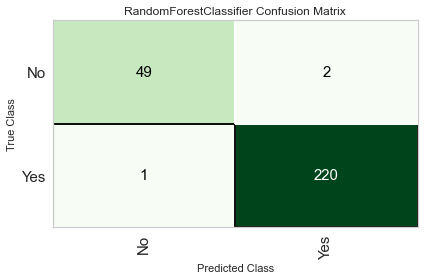

In [138]:
plot_model(f, plot = 'confusion_matrix')

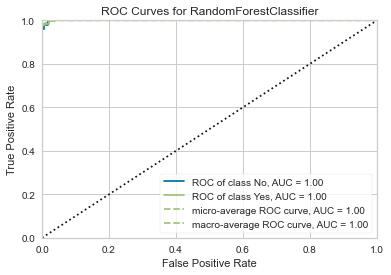

In [139]:
plot_model(f)

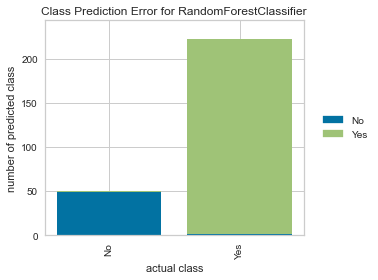

In [141]:
plot_model(f, plot = 'error')

In [2]:
evaluate_model(f)

NameError: name 'evaluate_model' is not defined